In [1]:
from auto_diagnostic.tfidf import TFIDF
from auto_diagnostic.lemmatization import Lemmatization
from auto_diagnostic.preprocess import tokenize

from dataloader.makedata import Dataloader

In [5]:
tfidf = TFIDF()
df = Dataloader("../data/raw/texto1.pdf").make_csv()
tokenized = tokenize(df['text_column'])
model = Lemmatization()
lemmatized_list = model.lemmatize(tokenized)
word_set = tfidf.get_wordset_from_text(lemmatized_list)
tfidf_vectors = tfidf.tf_idf()
closest = tfidf.get_closest_neighbors(vectors=tfidf_vectors)
print(closest)


[nltk_data] Downloading package stopwords to /home/aizen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/home/aizen/dev/atlantico-academy/cognitive-comp/auto-diagnostic/dataloader/makedata.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_field][i] = unidecode.unidecode(df[text_field].iloc[i])

/home/aizen/dev/atlantico-academy/cognitive-comp/auto-diagnostic/dataloader/makedata.py:35: FutureWarning: The default value of regex will change from True to False in a future version.
  df[text_field] = df[text_field].str.replace(r"[()\;\,\%\-\/\--\.!?@\'\`\"\_\n]", " ")

[nltk_data] Downloading package stopwords to /home/aizen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[{'key': (1, 'virtude', 0.03105757751181389), 'neighbors': [(0, 'sobre', 0.02871384856321178), (2, 'numero', 0.03105757751181389), (3, 'desfecho', 0.03105757751181389)]}, {'key': (2, 'numero', 0.03105757751181389), 'neighbors': [(0, 'sobre', 0.02871384856321178), (1, 'virtude', 0.03105757751181389), (3, 'desfecho', 0.03105757751181389), (4, 'publicar', 0.02871384856321178)]}, {'key': (3, 'desfecho', 0.03105757751181389), 'neighbors': [(1, 'virtude', 0.03105757751181389), (2, 'numero', 0.03105757751181389), (4, 'publicar', 0.02871384856321178), (5, 'rotulo', 0.03105757751181389)]}, {'key': (5, 'rotulo', 0.03105757751181389), 'neighbors': [(3, 'desfecho', 0.03105757751181389), (4, 'publicar', 0.02871384856321178), (6, 'semelhante', 0.03105757751181389), (7, 'disso', 0.02871384856321178)]}, {'key': (6, 'semelhante', 0.03105757751181389), 'neighbors': [(4, 'publicar', 0.02871384856321178), (5, 'rotulo', 0.03105757751181389), (7, 'disso', 0.02871384856321178), (8, 'outro', 0.028713848563211

tamanho de node_sizes: {'virtude': 0.03105757751181389, 'sobre': 0.02871384856321178, 'numero': 0.03105757751181389, 'desfecho': 0.03105757751181389, 'publicar': 0.02871384856321178, 'rotulo': 0.03105757751181389, 'semelhante': 0.03105757751181389, 'disso': 0.02871384856321178, 'outro': 0.02871384856321178}
tamanho de edge_weights: {('virtude', 'sobre'): 1, ('virtude', 'numero'): 1, ('virtude', 'desfecho'): 2, ('sobre', 'numero'): 2, ('numero', 'desfecho'): 1, ('numero', 'publicar'): 2, ('desfecho', 'publicar'): 1, ('desfecho', 'rotulo'): 2, ('publicar', 'rotulo'): 1, ('publicar', 'semelhante'): 2, ('rotulo', 'semelhante'): 1, ('rotulo', 'disso'): 2, ('semelhante', 'disso'): 1, ('semelhante', 'outro'): 2}


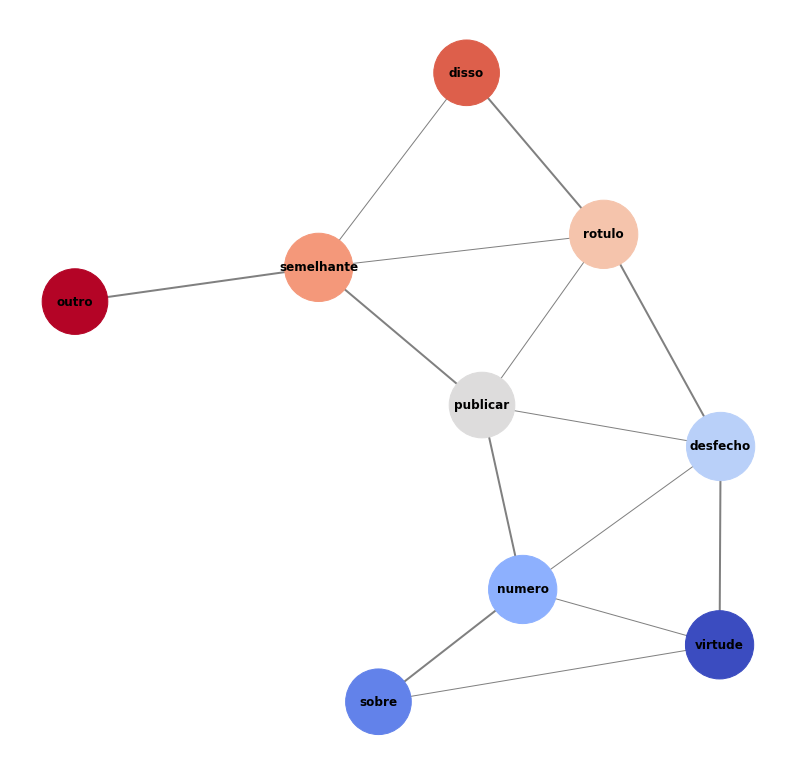

In [6]:
import networkx as nx
from matplotlib import pyplot as plt


plt.subplots(figsize=(14, 14))

G = nx.Graph()

for node in closest:

    node_key = node['key']
    close_nodes = node['neighbors']

    G.add_node(node_key[1])

    for n in close_nodes:
        G.add_node(n[1], size=n[2])
        G.add_edge(node_key[1], n[1], weight=abs(node_key[0] - n[0]))

node_sizes = nx.get_node_attributes(G, 'size')
edge_weights = nx.get_edge_attributes(G, 'weight')

print(f'tamanho de node_sizes: {node_sizes}')
print(f'tamanho de edge_weights: {edge_weights}')


pos = nx.spring_layout(G, k=0.5, iterations=20)

cmap = plt.cm.coolwarm
colors = [n for n in range(len(G.nodes()))]

nx.draw(
    G,
    pos,
    with_labels=True,
    font_size=12,
    font_weight='bold',
    node_size=[n*1.5*10**5 for n in node_sizes.values()],
    width=list(edge_weights.values()),
    cmap=cmap,
    node_color=colors,
    edge_color='grey',
    alpha=1
)

In [6]:
from graphs import word_graph

tamanho de node_sizes: {'servida': 0.017748443809982348, 'milho': 0.017748443809982348, 'cancer': 0.01001969048794036, 'toracico': 0.016576579335681296, 'concentrado': 0.017748443809982348, 'caso': 0.013741812708479776, 'figura': 0.016576579335681296, 'procedimento': 0.017748443809982348, 'dado': 0.011925024675467135, 'forte': 0.017748443809982348, 'pulmonar': 0.015745128259231064, 'escamosa': 0.015745128259231064}
tamanho de edge_weights: {('servida', 'milho'): 1, ('servida', 'cancer'): 2, ('milho', 'cancer'): 1, ('milho', 'toracico'): 2, ('toracico', 'concentrado'): 2, ('concentrado', 'caso'): 1, ('concentrado', 'figura'): 1, ('concentrado', 'procedimento'): 2, ('figura', 'procedimento'): 1, ('procedimento', 'dado'): 1, ('procedimento', 'forte'): 2, ('dado', 'forte'): 1, ('forte', 'pulmonar'): 1, ('forte', 'escamosa'): 2}


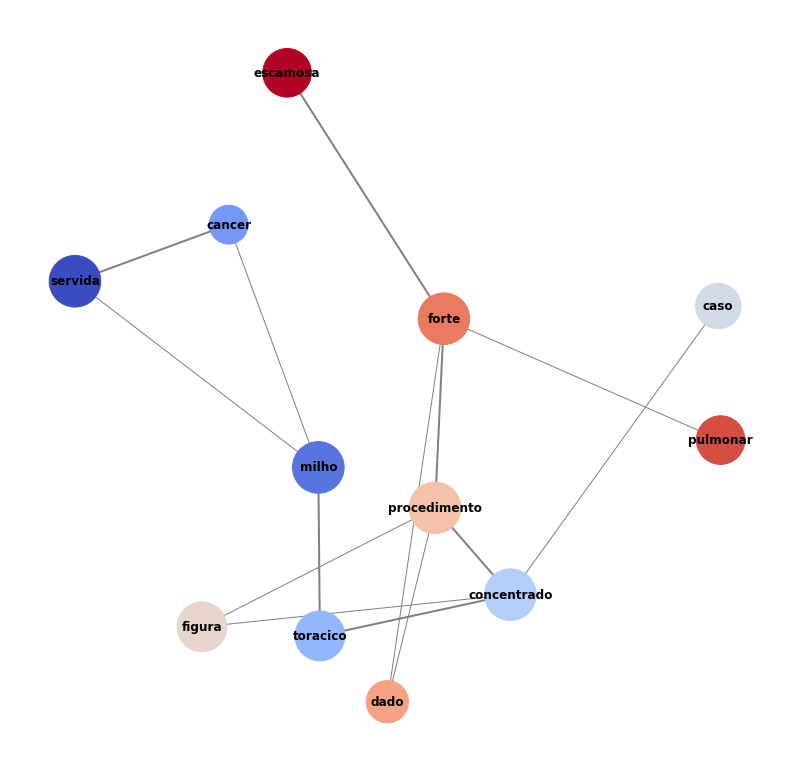

In [9]:
word_graph.graph(closest)